In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns

# **Description:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [2]:
#Load Data
df = pd.read_csv("../data/creditcard.csv")

In [3]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
anomalies = df[df["Class"]==1]
no_anomalies = df[df["Class"]==0]

In [5]:
anomalies.shape

(492, 31)

In [6]:
no_anomalies.shape

(284315, 31)

In [7]:
print("number of samples :", df.shape[0])
print("duration : 2 days in September 2013")
print("number of anomalies : ", anomalies.shape[0])

number of samples : 284807
duration : 2 days in September 2013
number of anomalies :  492


# **Plotting Statistics**

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

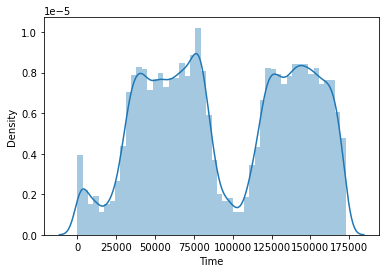

In [8]:
sns.distplot(df['Time'])

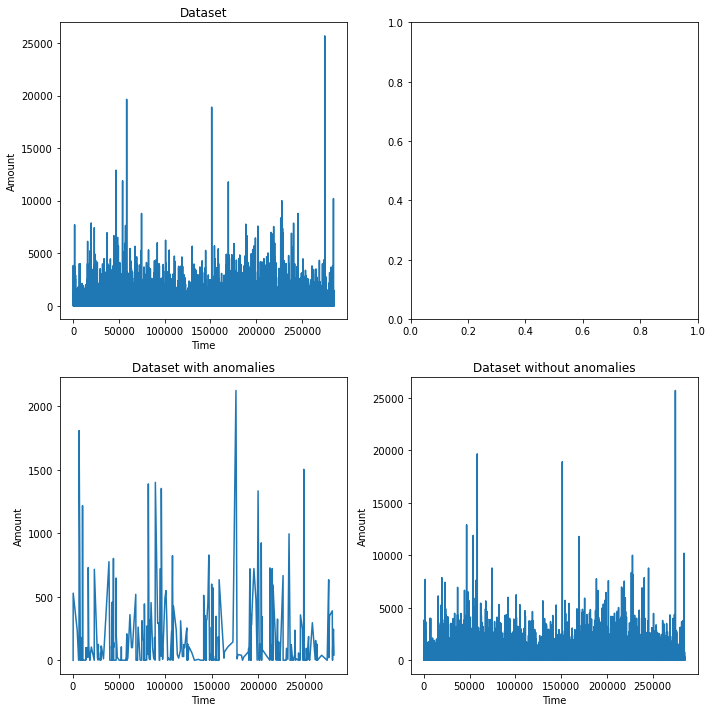

In [9]:
fig,ax = plt.subplots(2,2,figsize=(10,10))

ax[0,0].plot(df.index.tolist(),df["Amount"])
ax[0,0].set_xlabel("Time")
ax[0,0].set_ylabel("Amount")
ax[0,0].set_title("Dataset")

ax[1,0].plot(anomalies.index.tolist(),anomalies["Amount"])
ax[1,0].set_xlabel("Time")
ax[1,0].set_ylabel("Amount")
ax[1,0].set_title("Dataset with anomalies")

ax[1,1].plot(no_anomalies.index.tolist(),no_anomalies["Amount"])
ax[1,1].set_xlabel("Time")
ax[1,1].set_ylabel("Amount")
ax[1,1].set_title("Dataset without anomalies")

fig.tight_layout()

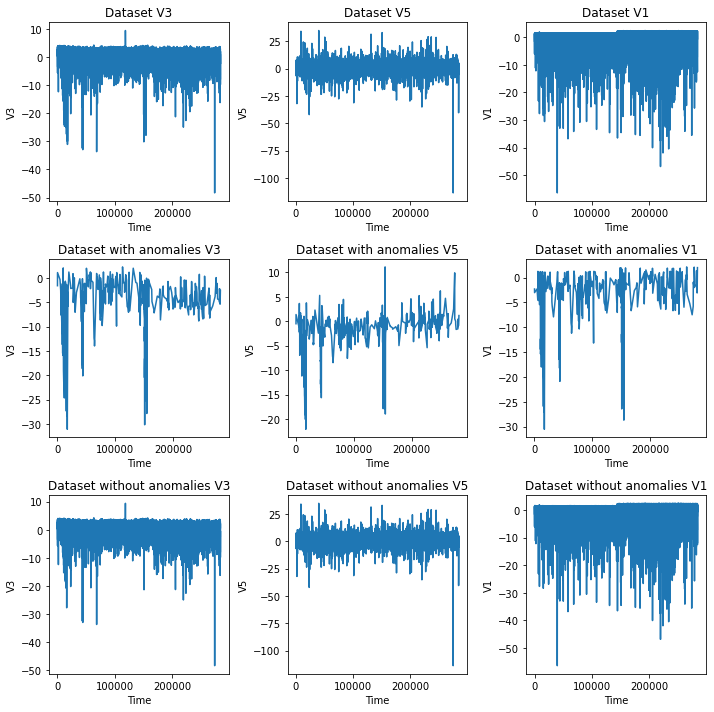

In [10]:
fig,ax = plt.subplots(3,3,figsize=(10,10))

#1st Column 
ax[0,0].plot(df.index.tolist(),df["V3"])
ax[0,0].set_xlabel("Time")
ax[0,0].set_ylabel("V3")
ax[0,0].set_title("Dataset V3")

ax[1,0].plot(anomalies.index.tolist(),anomalies["V3"])
ax[1,0].set_xlabel("Time")
ax[1,0].set_ylabel("V3")
ax[1,0].set_title("Dataset with anomalies V3")

ax[2,0].plot(no_anomalies.index.tolist(),no_anomalies["V3"])
ax[2,0].set_xlabel("Time")
ax[2,0].set_ylabel("V3")
ax[2,0].set_title("Dataset without anomalies V3")

#2nd Column
ax[0,1].plot(df.index.tolist(),df["V5"])
ax[0,1].set_xlabel("Time")
ax[0,1].set_ylabel("V5")
ax[0,1].set_title("Dataset V5")

ax[1,1].plot(anomalies.index.tolist(),anomalies["V5"])
ax[1,1].set_xlabel("Time")
ax[1,1].set_ylabel("V5")
ax[1,1].set_title("Dataset with anomalies V5")

ax[2,1].plot(no_anomalies.index.tolist(),no_anomalies["V5"])
ax[2,1].set_xlabel("Time")
ax[2,1].set_ylabel("V5")
ax[2,1].set_title("Dataset without anomalies V5")

#3rd Column
ax[0,2].plot(df.index.tolist(),df["V1"])
ax[0,2].set_xlabel("Time")
ax[0,2].set_ylabel("V1")
ax[0,2].set_title("Dataset V1")

ax[1,2].plot(anomalies.index.tolist(),anomalies["V1"])
ax[1,2].set_xlabel("Time")
ax[1,2].set_ylabel("V1")
ax[1,2].set_title("Dataset with anomalies V1")

ax[2,2].plot(no_anomalies.index.tolist(),no_anomalies["V1"])
ax[2,2].set_xlabel("Time")
ax[2,2].set_ylabel("V1")
ax[2,2].set_title("Dataset without anomalies V1")

fig.tight_layout()